# Introdução

Bem vindo ao Exemplo 4! Nesse dataset faremos uma previsão muito utilizada em bancos, para saber quais possiveis clientes abandonarão o banco.

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('BankChurners.csv')

(Dropando colunas inúteis, recomendado pelo criador do dataset)

In [33]:
df = df.drop(columns= ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Verificando valores nulos 
(Não há)

In [35]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Análise geral

Vamos fazer uma análise geral das colunas que julgamos ser mais importantes. E que talvez necessitem de algumas correções.

Importando bibliotecas de visualização, para análise gráfica.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

Visualizando mapa de calor, para saber quais colunas mais se relacionam.

<AxesSubplot:>

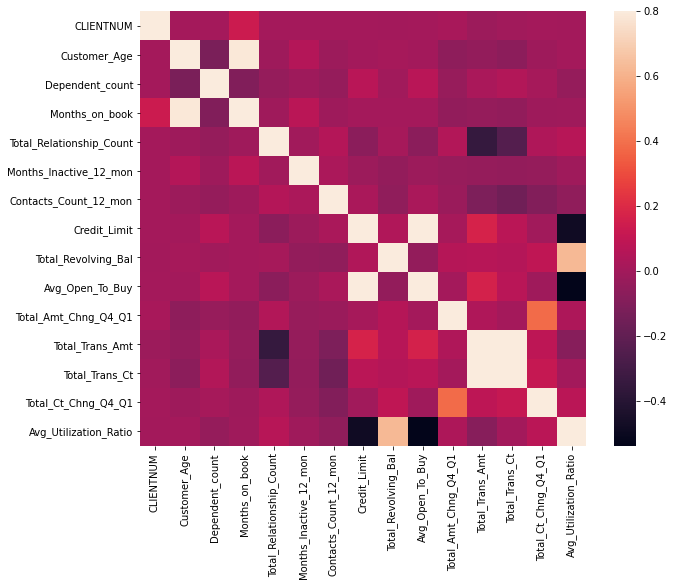

In [37]:
corr = df.corr()

plt.figure(figsize= (10, 8))
sns.heatmap(corr, vmax= 0.8)

Podemos tirar algumas conclusões desse mapa de calor:

-  A coluna 'Months_on_book' (meses no livro) tem alta relação com a coluna 'Customer_Age'. O que é esperado, afinal quanto mais velho, provavelmente mais tempo no banco o cliente tem.

### Attrition_Flag

Vamos analisar colunas que julgamos ser mais importantes separadamente. Começando é claro, por Attrition_Flag, que é nosso foco principal, a coluna indica se o cliente bandonou o banco ou não.

In [38]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

/home/reinoso/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

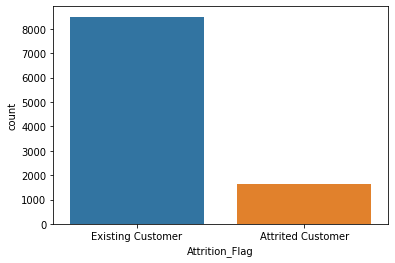

In [39]:
sns.countplot(df['Attrition_Flag'])

Podemos ver que há uma quantidade de clientes fiéis muito maior.

### Customer_Age

In [40]:
df['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

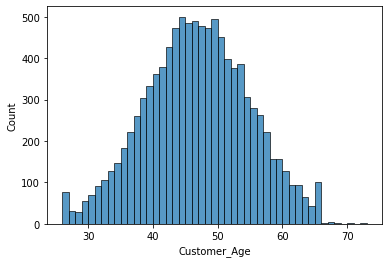

In [41]:
sns.histplot(df['Customer_Age'])

### Gender

In [42]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

/home/reinoso/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

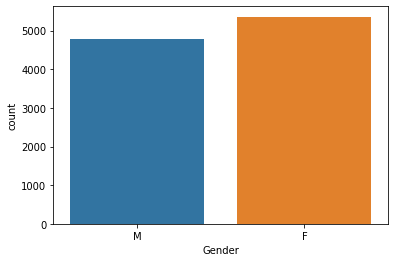

In [43]:
sns.countplot(df['Gender'])

In [44]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

### Education_Level

/home/reinoso/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Graduate'),
  Text(1, 0, 'High School'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Uneducated'),
  Text(4, 0, 'College'),
  Text(5, 0, 'Post-Graduate'),
  Text(6, 0, 'Doctorate')])

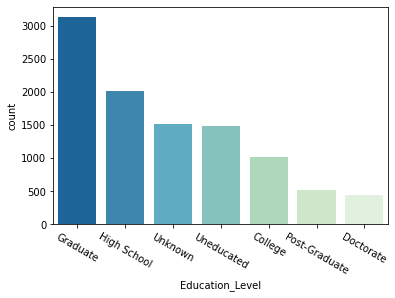

In [45]:
sns.countplot(df['Education_Level'], order= df['Education_Level'].value_counts().index, palette= 'GnBu_r')

plt.xticks(rotation= -30)

### Marital_Status

In [46]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

/home/reinoso/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

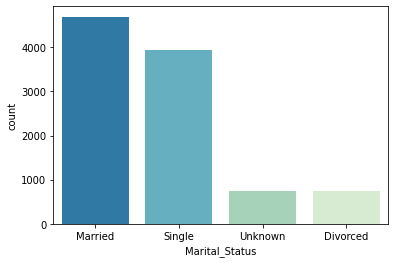

In [47]:
sns.countplot(df['Marital_Status'], order= df['Marital_Status'].value_counts().index, palette= 'GnBu_r')

### Card_Category

In [48]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

/home/reinoso/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Card_Category', ylabel='count'>

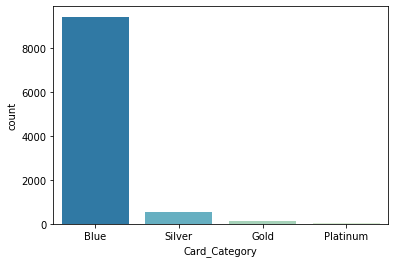

In [49]:
sns.countplot(df['Card_Category'], order= df['Card_Category'].value_counts().index, palette= 'GnBu_r')

### Months_on_book

In [50]:
df['Months_on_book'].describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

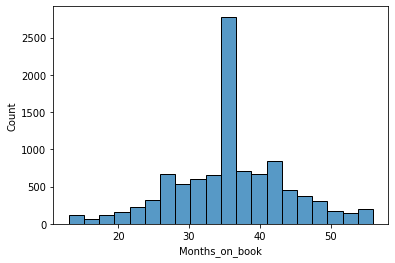

In [51]:
sns.histplot(df['Months_on_book'], bins=20)

## Transformando Dados

Para fazer o nosso modelo, precisamos passar os dados categóricos 'object' para 'int' ou 'float', a biblioteca sklearn tem a função 'LabelEncoder().fit_transform()' que é perfeita pra isso.

In [54]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [55]:
for col in df.columns:
    if df[col].dtype == np.object:
        df[col] = LabelEncoder().fit_transform(df[col])

<ipython-input-55-f74ca7d14e29>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:


# Criando Modelo

Importando bibliotecas

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Separando dados de treino e teste

In [57]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

Calculando accuracia do nosso modelo.

In [58]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

p = rf.predict(X_test)

accuracy_score(p, y_test)

0.9616903633491312